In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [5]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

d = f(dt, t)

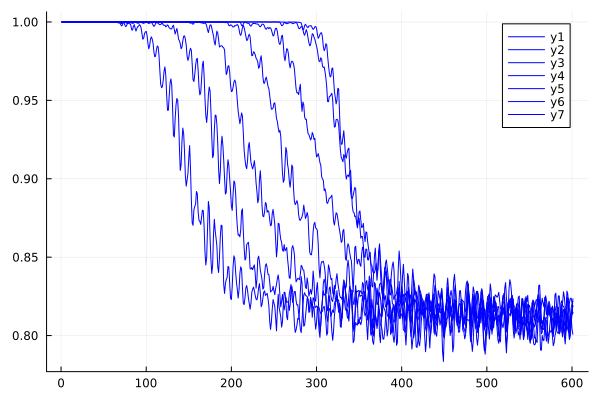

In [8]:
t = 30
n = Integer(floor(t/0.1))+1
v = []
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
solvers = [Rodas5]
colors = [:Blue :Red]
p = plot()
for i = 1
    for k = [10 20 40 80 160 320 640]
        str = string("Variables", "\\", "SolutionMatrices", "\\", solvers[i], "\\", k, ".jld2")
        Mest = FileIO.load(str, "M")
        C = CorrelationMatrix(Mest,Mtrue,1331,601)
        Cavg = sum(C,dims=1)/1331
        # push!(v,1-minimum(Cavg[1:n]))
        plot!(p,Cavg',color=colors[i])
    end
end
display(p)

In [33]:
Mest = FileIO.load(raw"Variables\SolutionMatrices\RK4\160.jld2", "M")
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
C = CorrelationMatrix(Mest,Mtrue,1331,601)
Cavg = sum(C,dims=1)/1331
;

In [ ]:
t = 9
i = Integer(floor(t/0.1))+1
v = ones(1,i)'-Cavg[1:i]
min = maximum(v)
idx = argmax(v)[1]*0.1
print(min, " ", idx)

In [11]:
d = 0.025
v1 = []
v2 = []
p2 = plot()
p3 = plot()
for d = 0.01:0.01:0.15
    for solver = [Rodas5]
        v = []
        for k = [10 20 40 80 160 320 640]
            str = string("Variables", "\\", "SolutionMatrices", "\\", solver, "\\", k, ".jld2")
            Mest = FileIO.load(str, "M")
            C = CorrelationMatrix(Mest,Mtrue,1331,601)
            Cavg = sum(C,dims=1)/1331

            min = 1
            minidx = 601
            for i = 1:601
                if Cavg[i] <= min && (1 - Cavg[i]) <= d
                    minidx = i
                end
            end
            push!(v,minidx*0.1)
        end
        plot!(p2, [0.1/10, 0.1/20, 0.1/40, 0.1/80, 0.1/160, 0.1/320, 0.1/640], v)
        plot!(p3, [10 20 40 80 160 320 640]', v)
        push!(v1, v)
    end
end

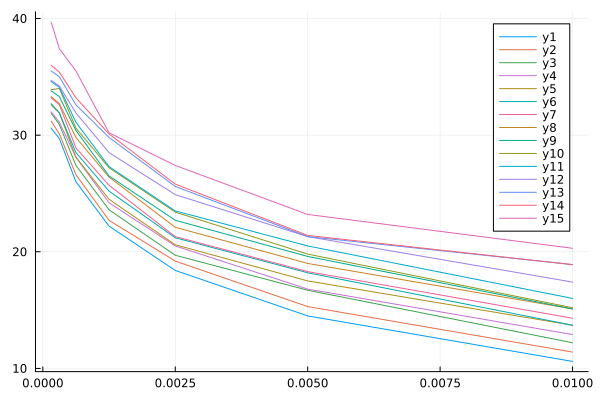

In [12]:
display(p2) 

In [43]:
Mest = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\320.jld2", "M")
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
C = CorrelationMatrix(Mest,Mtrue,1331,601)
Cavg = sum(C,dims=1)/1331
;

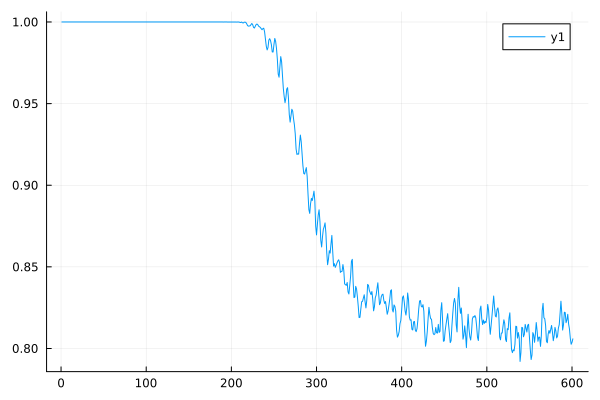

In [44]:
plot(Cavg')

In [60]:
τ = 0.01
Mt=zeros(7,1331)
for solver = [RK4]
    for k = [1 2 3 4 5 6 7]
        str = string("Variables", "\\", "SolutionMatrices", "\\", solver, "\\", 10*2^(k-1), ".jld2")
        print(str)
        Mest = FileIO.load(str, "M")
        C = CorrelationMatrix(Mest,Mtrue,1331,601)
        for j = 1:1331
            for i = 1:601
                if 1-C[j,i]<=τ && tvec[j]<(i-1)*0.1
                    Mt[k,j] = (i-1)*0.1
                elseif 1-C[j,i]>τ
                    break
                end
            end
        end
    end
end

Variables\SolutionMatrices\RK4\10.jld2

Variables\SolutionMatrices\RK4\20.jld2

Variables\SolutionMatrices\RK4\40.jld2

Variables\SolutionMatrices\RK4\80.jld2

Variables\SolutionMatrices\RK4\160.jld2

Variables\SolutionMatrices\RK4\320.jld2

Variables\SolutionMatrices\RK4\640.jld2

In [62]:
tvec=Mt[2,:]
histogram(tvec,bins=range(0, 60, length=61))

In [54]:
Mt[1,:]==Mt[2,:]

false

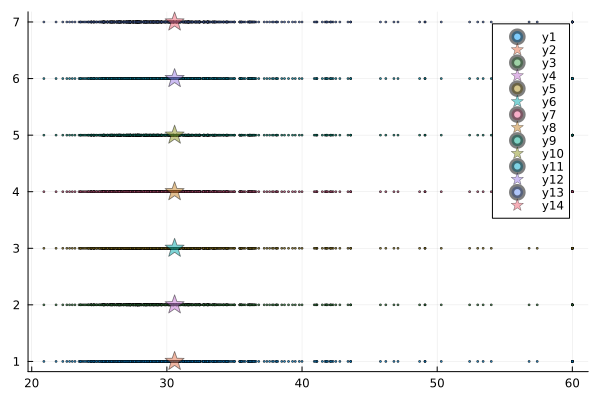

In [33]:
p = plot()
for k = [1 2 3 4 5 6 7]
    Mt[k,:]=tvec
    y = ones(1, length(tvec))*k
    scatter!(p,tvec',y',m=(0.5, 1))
    scatter!(p,[avg],[k],m=(0.5,:star5,10))
end
display(p)

In [ ]:
m = zeros(3*100,60)
for i = 1:100
    m[3*(i-1)+1:3*i,:] = ones(3,60)
end
m